In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
var=pd.read_csv('/content/wbcd.csv')
var.head(3)

In [0]:
dummies = {'B': 1, 'M': 0}
var['diagnosis'] = var['diagnosis'].map(dummies)

del var['id']
y=var.diagnosis
del var['diagnosis']
X=var

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
ac=accuracy_score(y_pred, y_test)
cm=confusion_matrix(y_pred, y_test)
print(cm)
print(ac)

[[32  5]
 [ 5 72]]
0.9122807017543859


In [0]:
#Tree Visualization

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

In [0]:
features=list(X.columns)

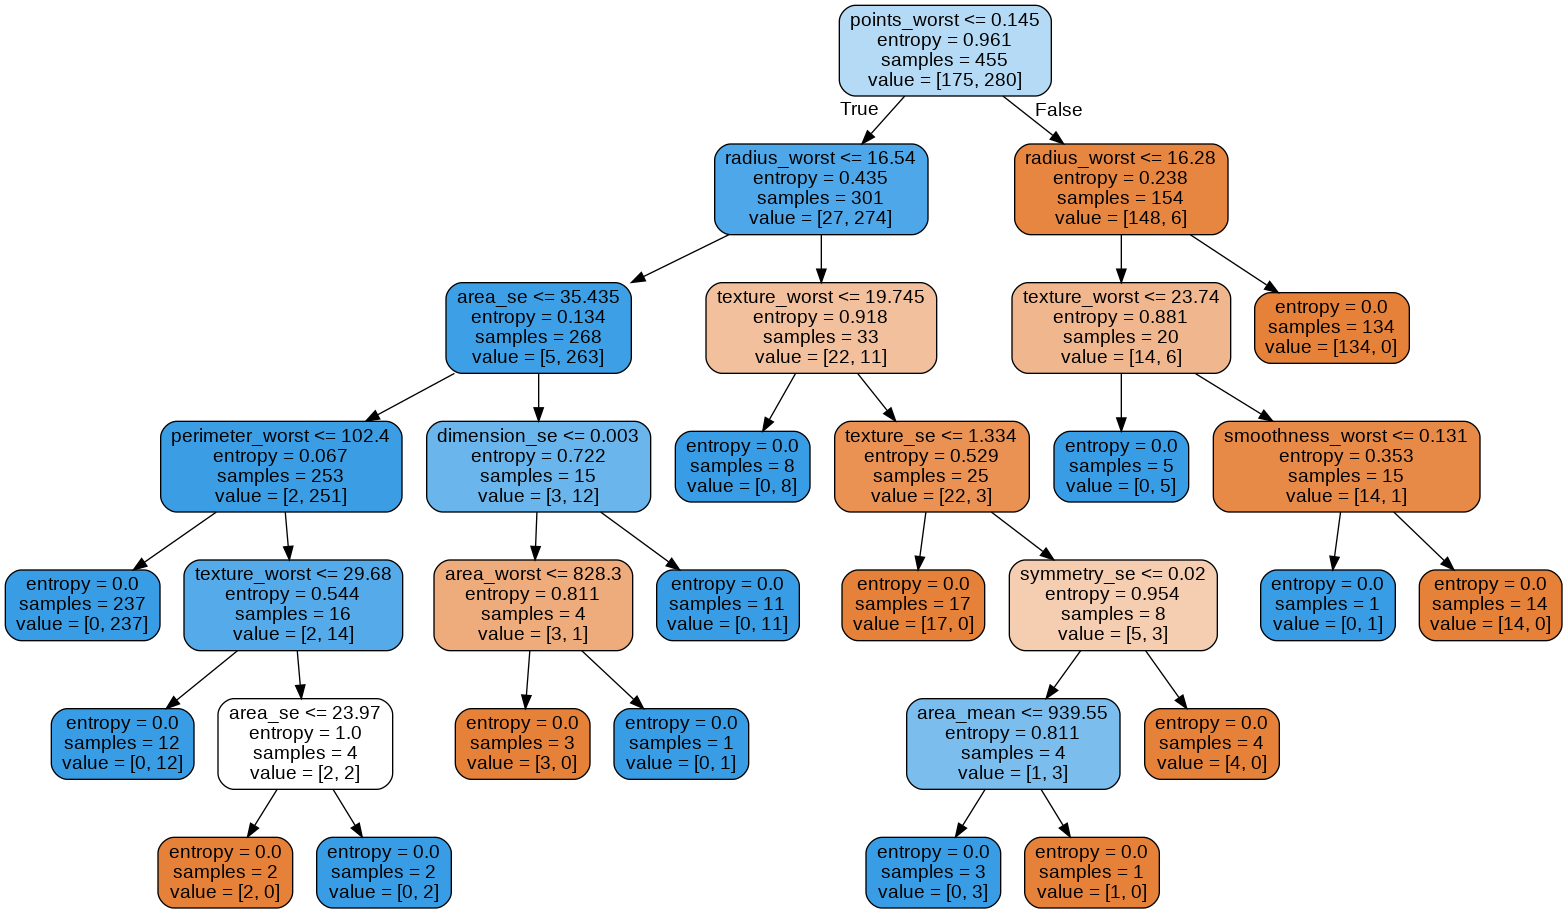

In [60]:
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())